Preparation

In [1]:
# import libraries and set matplotlib options
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# import dataset 
df_house = pd.read_csv("data/eda.csv")
df_house_cl = pd.read_csv("data/eda.csv")

# Data Exploration

In [3]:
df_house.shape

(21597, 21)

In [4]:
df_house.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [5]:
df_house.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


In [6]:
# Calculate number and percentage of NaNs

def nans_sum_perc(x):
    nans_sum_perc_d = {}
    for i in x.columns:
        sum_nan = x[i].isna().sum() 
        if  sum_nan > 0:
            perc_nan = round((sum_nan / x[i].shape[0]) * 100, 2)
            nans_sum_perc_d.update({i: [sum_nan, perc_nan]})
    return pd.DataFrame.from_dict(nans_sum_perc_d, orient='index', columns=['NaN Count', 'NaN %'])

nans_sum_perc(df_house)

,NaN Count,NaN %
waterfront,2391,11.070
view,63,0.290
sqft_basement,452,2.090
yr_renovated,3848,17.820


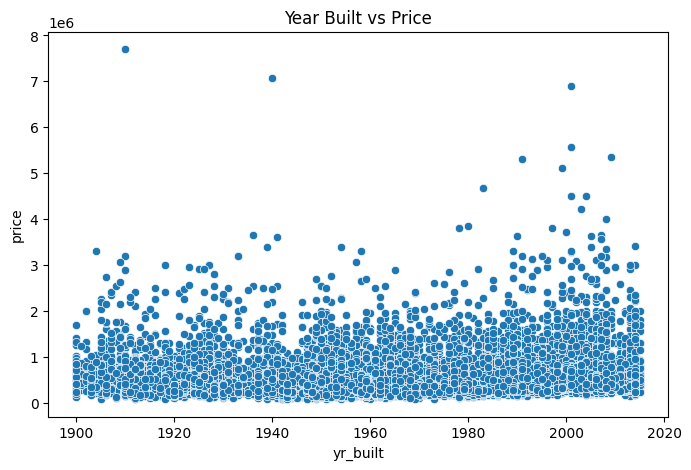

In [7]:
sns.scatterplot(x='yr_built', y='price', data=df_house)
plt.title('Year Built vs Price')
plt.show()

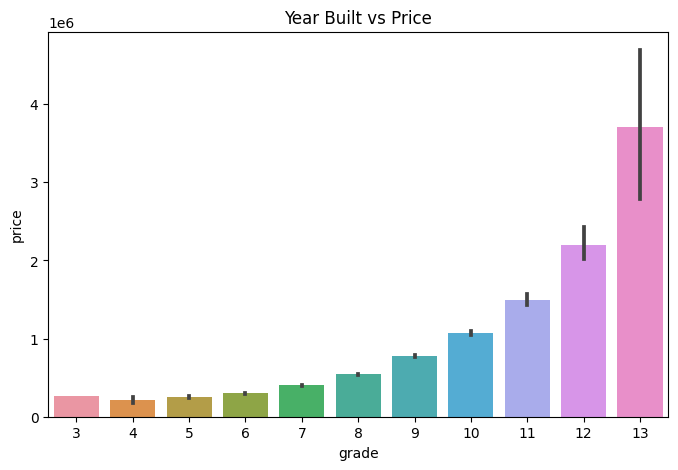

In [8]:
sns.barplot(x='grade', y='price', data=df_house)
plt.title('Year Built vs Price')
plt.show()

<Axes: xlabel='yr_built', ylabel='yr_renovated'>

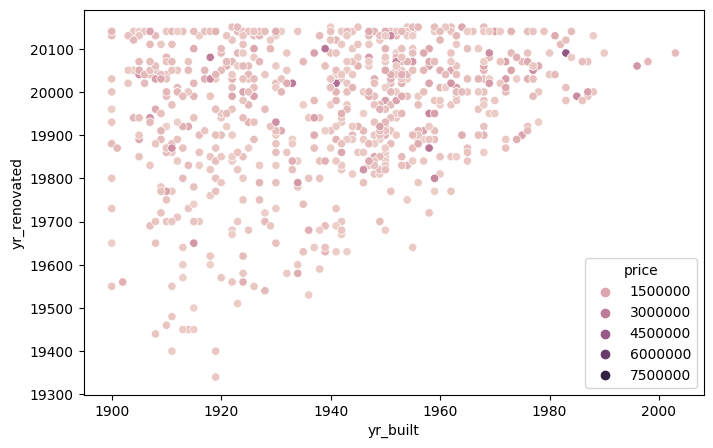

In [9]:
# Filter out rows where yr_renovated is 0
df_pairplot = df_house[df_house['yr_renovated'] != 0]

sns.scatterplot(x="yr_built", y="yr_renovated", data=df_pairplot, hue="price")

<Axes: xlabel='zipcode', ylabel='price'>

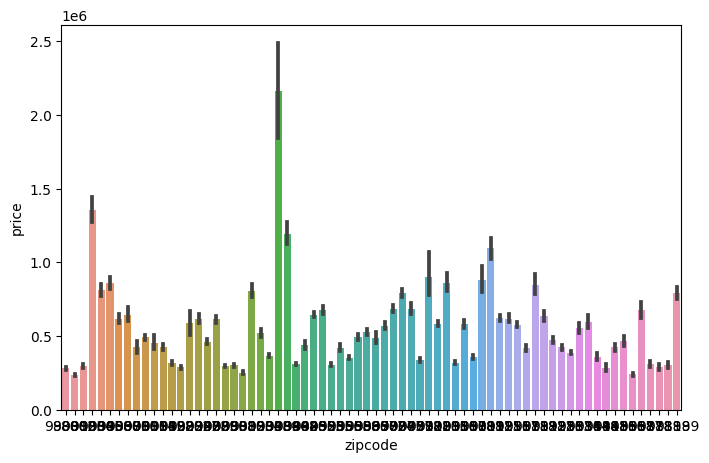

In [10]:
sns.barplot(x="zipcode", y="price", data=df_house)

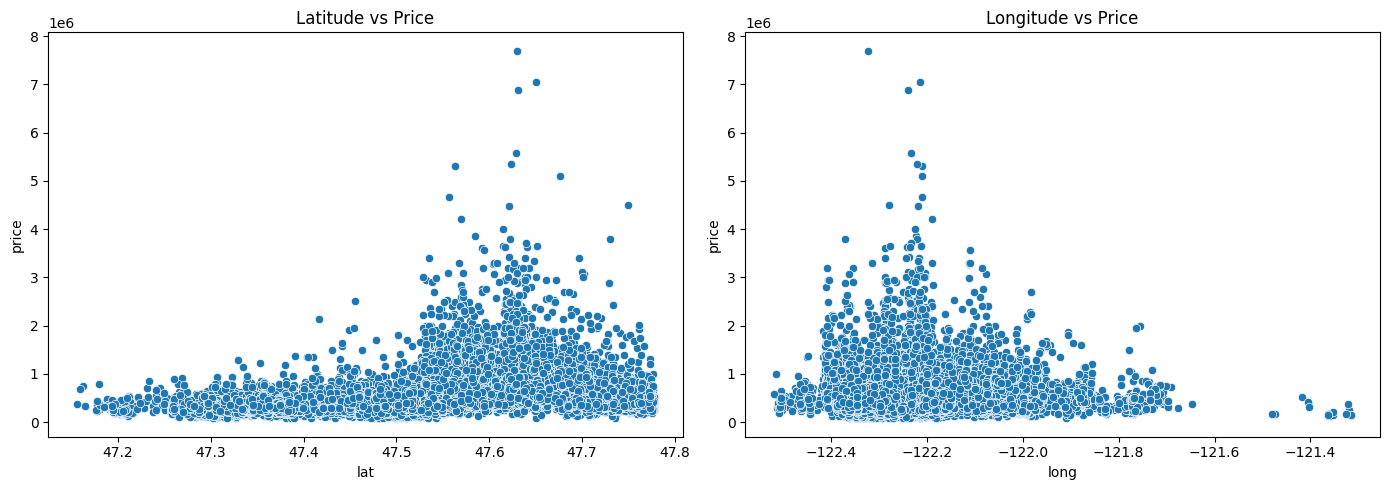

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x="lat", y="price", data=df_house, ax=axes[0])
axes[0].set_title("Latitude vs Price")

sns.scatterplot(x="long", y="price", data=df_house, ax=axes[1])
axes[1].set_title("Longitude vs Price")

plt.tight_layout()
plt.show()

In [12]:
# import libraries and set matplotlib options
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data cleaning

In [13]:
df_house_cl = pd.read_csv("data/eda.csv")
# check for missing values
import missingno as msno
# msno.bar(df_house_cl)

In [14]:
# check for data doubplicates --> no duplicates found
df_house_cl.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [15]:
# Convert 'date' column from string to datetime and remove the time
df_house_cl['date'] = pd.to_datetime(df_house_cl['date'])
df_house_cl['date'] = df_house_cl['date'].dt.date

# calculate first and last entry and timespan
first_record = df_house_cl.date.min()
last_record = df_house_cl.date.max()
timespan = last_record - first_record
print(f"earliest record: {first_record}")
print(f"latest record: {last_record}")
print(f"timespan of entries: {timespan}")


earliest record: 2014-05-02
latest record: 2015-05-27
timespan of entries: 390 days, 0:00:00


In [ ]:
# fill missing values in yr_renovated with zeros
df_house_cl.fillna({'yr_renovated': 0}, inplace=True)

# clean column yr_renovated by dropping 0.0 in the end of the nonnull entries and devide by 10 to get a realistic year
df_house_cl['yr_renovated'] = (df_house_cl['yr_renovated'] / 10).astype(int) 
df_house_cl["years_since_renovation"] = df_house_cl.apply(
                                                        lambda row: pd.to_datetime(row.date).year - row.yr_renovated 
                                                        if row.yr_renovated != 0 
                                                        else 0, axis=1)

# drop rows where year of renovation in in the future
df_house_cl = df_house_cl[df_house_cl['years_since_renovation'] != -1].copy()

In [ ]:

df_house_cl.shape

(21591, 22)

0
80


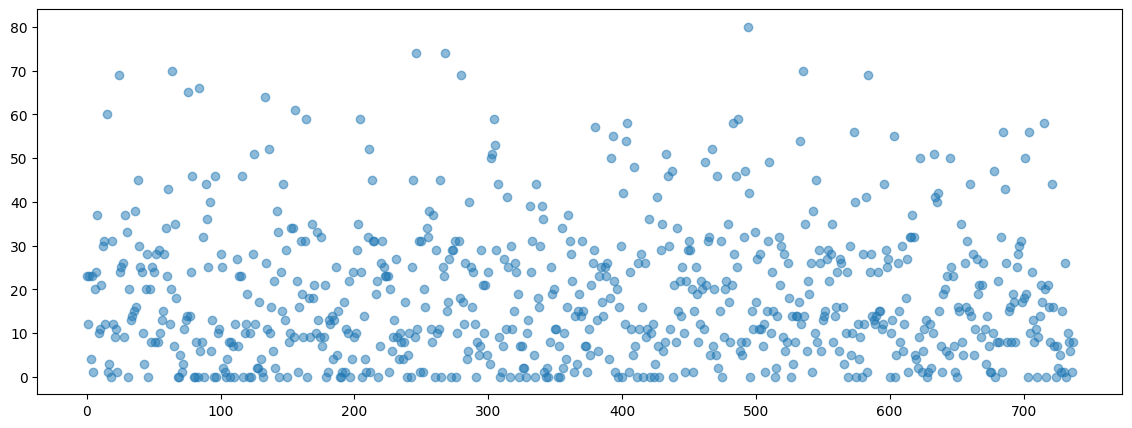

In [ ]:
# Create DataFrame with houses that have been renovated
df_renovated = df_house_cl[df_house_cl['yr_renovated'] != 0]
df_renovated.reset_index(drop=True, inplace=True)

# Create DataFrame with historic houses that have been renovated --> built before 1964
df_renovated_hist = df_house_cl[df_house_cl['yr_built'] < 1964]
df_renovated_hist.reset_index(drop=True, inplace=True)

# Plot all values of years_since_renovation to visually inspect the distribution
plt.figure(figsize=(14, 5))
plt.plot(df_renovated['years_since_renovation'].values, marker='o', linestyle='', alpha=0.5)
df_renovated['years_since_renovation'].min()

print(df_house_cl.years_since_renovation.min())
print(df_house_cl.years_since_renovation.max())

In [85]:
# Create DataFrame with historic houses that have been renovated --> built before 1964
df_renovated_hist = df_renovated[df_renovated['yr_built'] < 1964]
df_renovated_hist.reset_index(drop=True, inplace=True)
df_renovated_hist.shape

(631, 22)

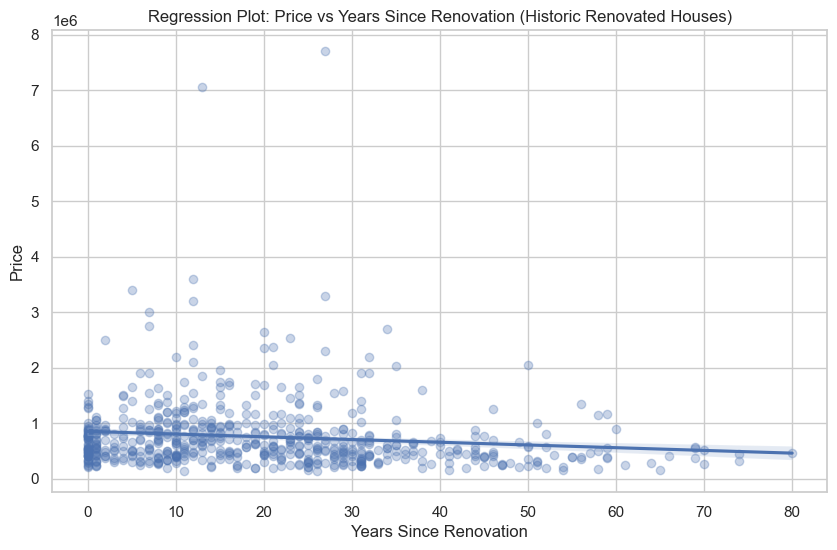

In [87]:
# Regression plot: price vs years_since_renovation
plt.figure(figsize=(10, 6))
sns.regplot(x='years_since_renovation', y='price', data=df_renovated_hist, scatter_kws={'alpha':0.3})
plt.title('Regression Plot: Price vs Years Since Renovation (Historic Renovated Houses)')
plt.xlabel('Years Since Renovation')
plt.ylabel('Price')
plt.show()

In [ ]:
# years in which houses were built that were renovated 
y_w_renovation = set(df_house_cl.yr_built[df_house_cl.years_since_renovation != 0])
y_w_renovation_list = sorted(list(y_w_renovation))


# Create bins from y_w_renovation (years in which houses were built that were renovated)
bins = pd.cut(y_w_renovation_list, [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], right=False)

In [ ]:
# # Create DataFrame with houses that have been renovated
# df_not_renovated = df_house_cl[pd.to_datetime(df_house_cl['date']).dt.year.isin(y_w_renovation_list)]
# df_not_renovated.reset_index(drop=True, inplace=True)

# # Plot all values of years_since_renovation to visually inspect the distribution
# plt.figure(figsize=(14, 5))
# plt.plot(df_not_renovated['years_since_renovation'].values, marker='o', linestyle='', alpha=0.5)
# df_not_renovated['years_since_renovation'].min()

# print(df_not_renovated.years_since_renovation.min())
# print(df_not_renovated.years_since_renovation.max())

In [48]:
# cat_num_correlation(df_renovated, "grade", "years_since_renovation")
corr_grade_renov = df_renovated.years_since_renovation.corr(df_renovated.grade,method="spearman")
print(f"Spearman correlation factor between 'Years Since Renovation' VS 'Grade': {round(corr_grade_renov, 2)}")

Spearman correlation factor between 'Years Since Renovation' VS 'Grade': -0.21


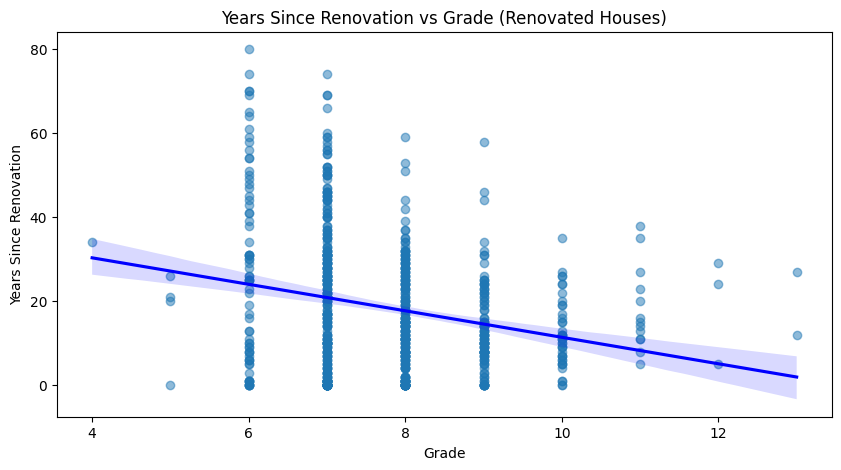

In [ ]:
# Scatterplot with regression line for renovated houses
plt.figure(figsize=(10, 5))
sns.regplot(x='grade', y='years_since_renovation', data=df_renovated, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Years Since Renovation vs Grade (Renovated Houses)')
plt.xlabel('Grade')
plt.ylabel('Years Since Renovation')
plt.show()


### Hypothesis 2: There should be a correlation between a high price per sqft(lot) and the location based on zip-codes.

<Axes: >

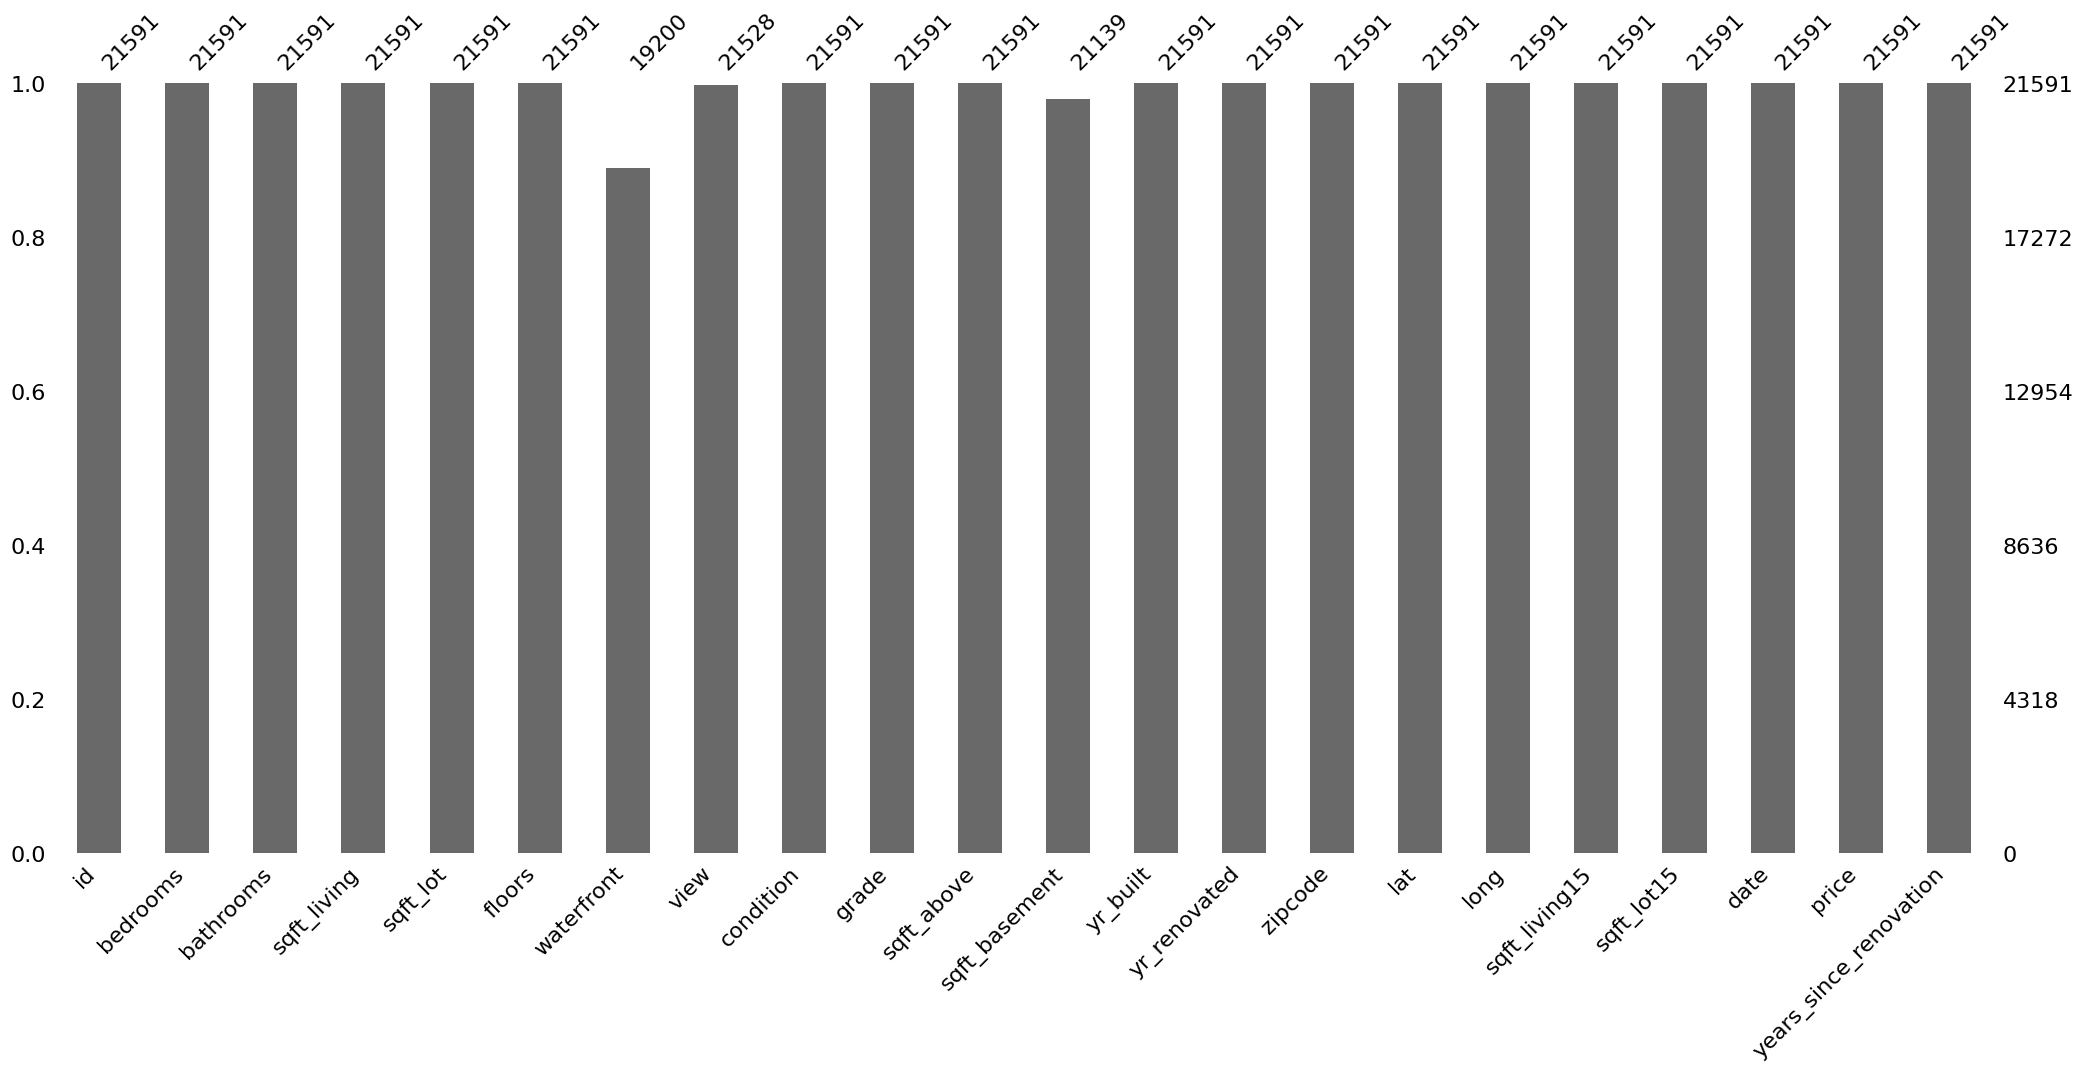

In [33]:
msno.bar(df_house_cl)

In [49]:
# spearman correlation between df_renovated.zipcode VS df_house_cl.sqft_lot
corr_grade_zip_lot = df_house_cl.sqft_lot.corr(df_renovated.zipcode,method="spearman")
print(f"Spearman correlation factor between 'Squarefeet Lot' VS 'ZIP-Code': {round(corr_grade_zip_lot, 2)}")

Spearman correlation factor between 'Squarefeet Lot' VS 'ZIP-Code': -0.04


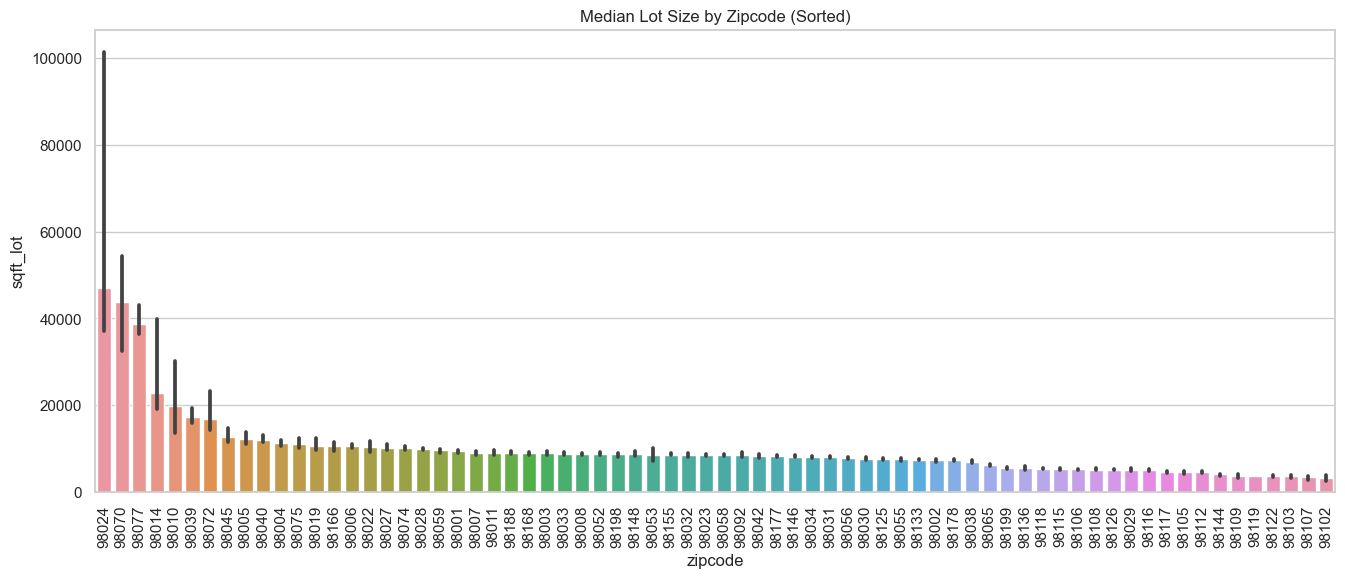

In [47]:
# Calculate median lot size per zipcode and sort
median_lot_by_zip = df_house_cl.groupby('zipcode')['sqft_lot'].median().sort_values(ascending=False)

# Use the sorted zipcodes for plotting
plt.figure(figsize=(16, 6))
sns.barplot(
    x='zipcode',
    y='sqft_lot',
    data=df_house_cl,
    order=median_lot_by_zip.index,
    estimator=np.median
)
plt.xticks(rotation=90)
plt.title('Median Lot Size by Zipcode (Sorted)')
plt.show()

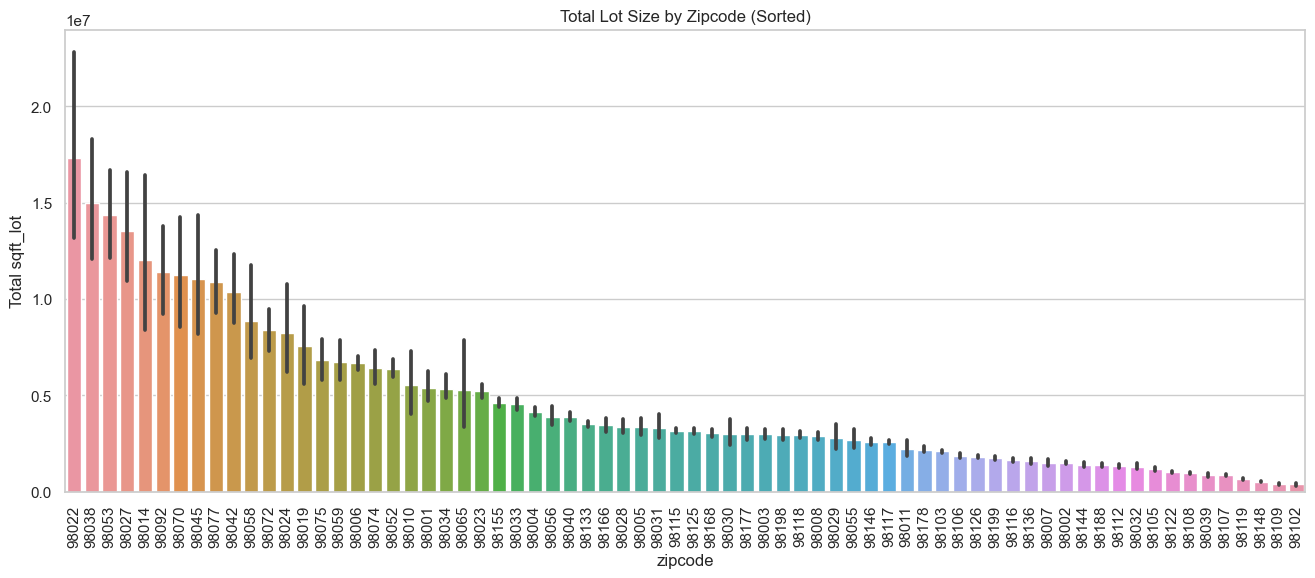

In [52]:
# Barplot of total (absolute) lot size per zipcode, sorted from high to low
total_lot_by_zip = df_house_cl.groupby('zipcode')['sqft_lot'].sum().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
sns.barplot(
    x='zipcode',
    y='sqft_lot',
    data=df_house_cl,
    order=total_lot_by_zip.index,
    estimator=sum
)
plt.xticks(rotation=90)
plt.title('Total Lot Size by Zipcode (Sorted)')
plt.ylabel('Total sqft_lot')
plt.xlabel('zipcode')
plt.show()

### Hypothesis 3: The higher price correlates to high sqft of nearest neighbours' houses.

In [74]:
# Add a column "price_per_sqft" calculated by price / sqft_living
df_house_cl['price_per_sqft'] = df_house_cl['price'] / df_house_cl['sqft_living']

In [ ]:
# Drop outliers based on price <= 4000000 and sqft_lot15 <= 400000
df_house_cl_wo_outl = df_house_cl[(df_house_cl['sqft_lot15'] <= 400000) & (df_house_cl['price'] <= 4000000.0)]


# Add a column "price_per_sqft" calculated by price / sqft_living
df_house_cl_wo_outl['price_per_sqft'] = df_house_cl_wo_outl['price'] / df_house_cl_wo_outl['sqft_living']

print(df_house_cl_wo_outl.shape)

(21572, 23)


In [79]:
# pearson correlation between df_renovated.price VS df_renovated.sqft_lot15
corr_grade_price_sqft15 = df_house_cl.price.corr(df_renovated.sqft_lot15,method="pearson")
print(f"""Pearson correlation factor between 'Price' VS 'SQFT Lot of the nearest 15 neighbours':
      {round(corr_grade_price_sqft15, 2)}""")

# pearson correlation between df_renovated.price VS df_renovated.sqft_lot15 without outliers
corr_grade_price_sqft15_outl = df_house_cl_wo_outl.price.corr(df_house_cl_wo_outl.sqft_lot15,method="pearson")
print(f"""Pearson correlation factor w/o outliers between 'Price' VS 'SQFT Lot of the nearest 15 neighbours':
      {round(corr_grade_price_sqft15_outl, 2)}""")

Pearson correlation factor between 'Price' VS 'SQFT Lot of the nearest 15 neighbours':
      0.01
Pearson correlation factor w/o outliers between 'Price' VS 'SQFT Lot of the nearest 15 neighbours':
      0.08


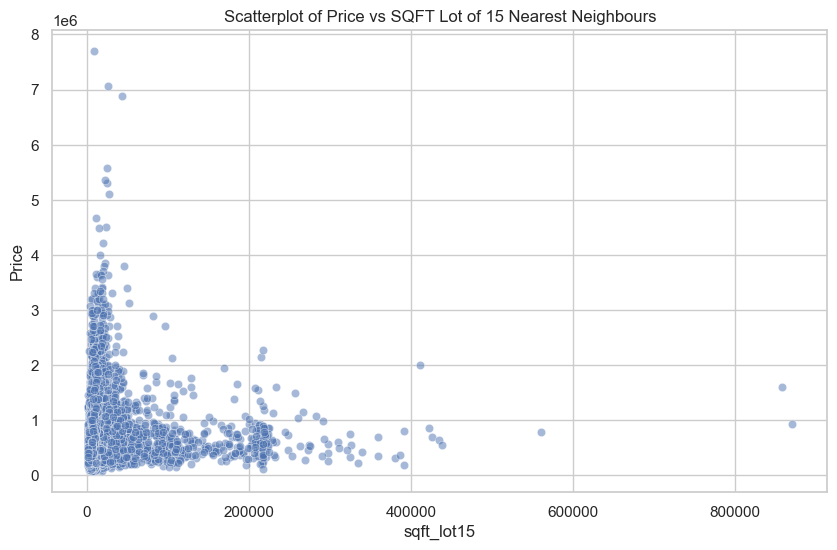

In [80]:
# plot price against sqft_lot15
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot15', y='price', data=df_house_cl, alpha=0.5)
plt.title('Scatterplot of Price vs SQFT Lot of 15 Nearest Neighbours')
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.show()

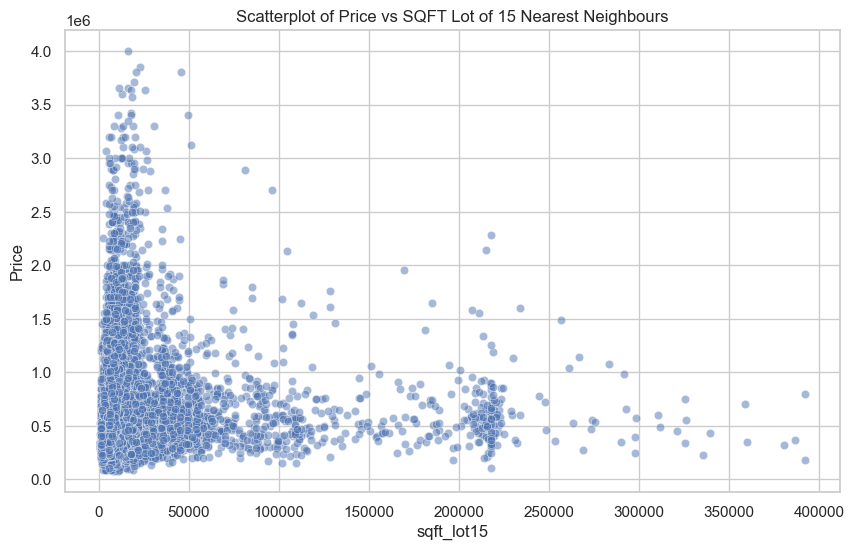

In [ ]:
# plot price against sqft_lot15 w/o outliers for clearer picture
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot15', y='price', data=df_house_cl_wo_outl, alpha=0.5)
plt.title('Scatterplot of Price vs SQFT Lot of 15 Nearest Neighbours')
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.show()

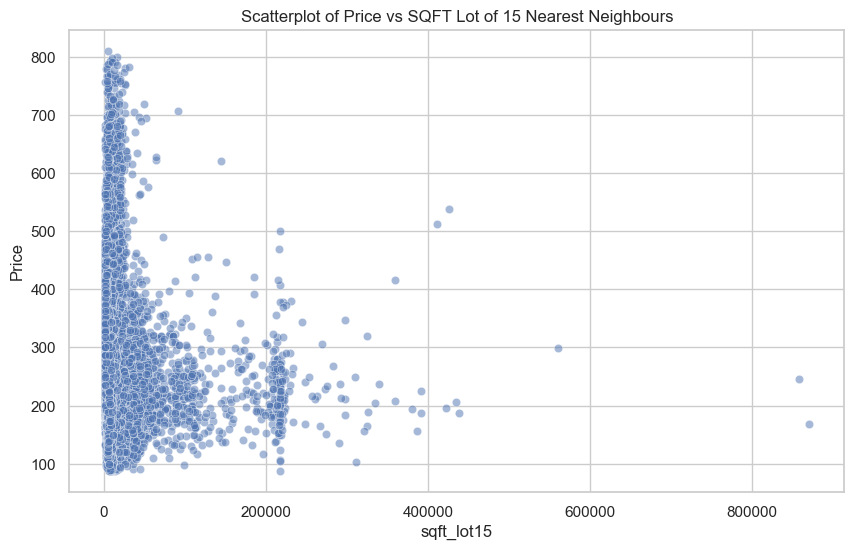

In [81]:
# plot price / sqft_living against sqft_lot15
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot15', y='price_per_sqft', data=df_house_cl, alpha=0.5)
plt.title('Scatterplot of Price vs SQFT Lot of 15 Nearest Neighbours')
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.show()

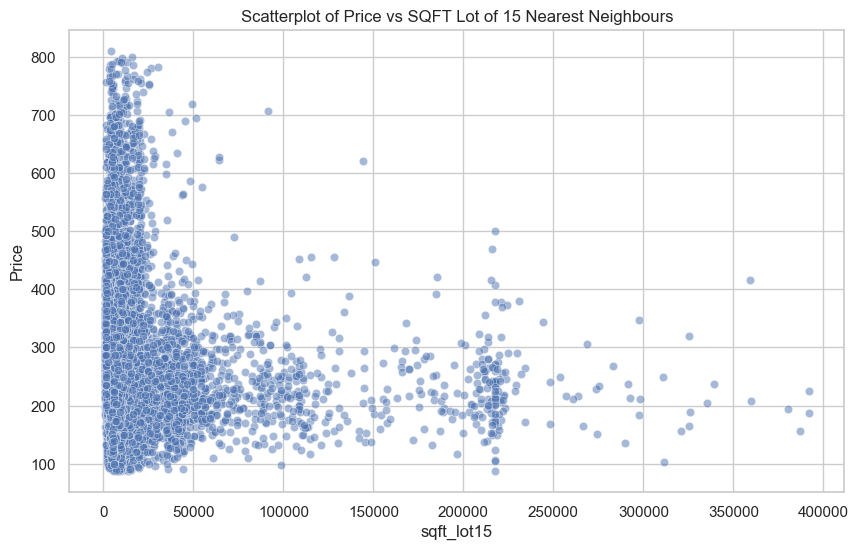

In [82]:
# plot price / sqft_living against sqft_lot15 w/o outliers for clearer picture
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot15', y='price_per_sqft', data=df_house_cl_wo_outl, alpha=0.5)
plt.title('Scatterplot of Price vs SQFT Lot of 15 Nearest Neighbours')
plt.xlabel('sqft_lot15')
plt.ylabel('Price')
plt.show()